## Exploratory Data Analysis 

### Importing the necessary libraries

In [58]:
import re
import pandas as pd
import numpy as np
import seaborn as sns               #for visualization
import matplotlib.pyplot as plt     #for visualization
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

### Load Dataset

In [37]:
data = pd.read_csv('../data/news/news_part1.csv')
data

,Ticker,Title,URL,Time Published,Authors,Summary,Relevance Score,Ticker Sentiment Score,Ticker Sentiment Label,Technology,...,Retail & Wholesale,Economy - Monetary,Energy & Transportation,Life Sciences,Blockchain,IPO,Earnings,Mergers & Acquisitions,Manufacturing,Finance
0,META,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.424632,Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
1,AAPL,Ads running on Meta saw return on spending inc...,https://www.business-standard.com/companies/ne...,2024-01-18 17:28:08,['Bloomberg'],Ads running on Meta Platforms Inc.'s apps saw ...,0.250386,0.094962,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000
2,HUM,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
3,AAPL,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.298567,0.098222,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
4,BAC,Here are the reasons why a new Wall Street upg...,https://www.cnbc.com/2024/01/18/what-activist-...,2024-01-18 16:48:19,['Jeff Marks'],"The Investing Club holds its ""Morning Meeting""...",0.076358,0.045194,Neutral,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.158519,0.00000,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79492,CRWD,2 Cybersecurity Stocks You Can Buy and Hold fo...,https://www.fool.com/investing/2023/08/27/2-cy...,2023-08-27 10:30:00,['Jeff Santoro'],These two companies have bright futures despit...,0.307731,0.219216,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.999975,0.00000,0.000000,0.000000
79493,PATH,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.472821,0.306128,Somewhat-Bullish,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79494,CRWD,3 Supercharged Tech Stocks to Buy Without Any ...,https://www.fool.com/investing/2023/08/26/3-su...,2023-08-26 10:45:00,['Keithen Drury'],There are still some growth stocks available t...,0.425925,0.135673,Neutral,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.744043,0.00000,0.000000,0.000000
79495,DE,Weekly Roundup,https://aap.thestreet.com/story/16131864/1/wee...,2023-08-25 22:01:00,[],Stocks staged a late comeback this week after ...,0.020001,0.109825,Neutral,0.166667,...,0.166667,0.999682,0.166667,0.166667,0.0,0.310843,1.000000,0.77141,0.166667,0.166667


### Data Exploration and Data Cleaning

In [38]:
#Understand DataSet
data.head().T

,0,1,2,3,4
Ticker,META,AAPL,HUM,AAPL,BAC
Title,Ads running on Meta saw return on spending inc...,Ads running on Meta saw return on spending inc...,Here are the reasons why a new Wall Street upg...,Here are the reasons why a new Wall Street upg...,Here are the reasons why a new Wall Street upg...
URL,https://www.business-standard.com/companies/ne...,https://www.business-standard.com/companies/ne...,https://www.cnbc.com/2024/01/18/what-activist-...,https://www.cnbc.com/2024/01/18/what-activist-...,https://www.cnbc.com/2024/01/18/what-activist-...
Time Published,2024-01-18 17:28:08,2024-01-18 17:28:08,2024-01-18 16:48:19,2024-01-18 16:48:19,2024-01-18 16:48:19
Authors,['Bloomberg'],['Bloomberg'],['Jeff Marks'],['Jeff Marks'],['Jeff Marks']
Summary,Ads running on Meta Platforms Inc.'s apps saw ...,Ads running on Meta Platforms Inc.'s apps saw ...,"The Investing Club holds its ""Morning Meeting""...","The Investing Club holds its ""Morning Meeting""...","The Investing Club holds its ""Morning Meeting""..."
Relevance Score,0.250386,0.250386,0.298567,0.298567,0.076358
Ticker Sentiment Score,0.424632,0.094962,0.098222,0.098222,0.045194
Ticker Sentiment Label,Bullish,Neutral,Neutral,Neutral,Neutral
Technology,1.0,1.0,0.5,0.5,0.5


In [39]:
#checking what are the variables in DataSet
data.columns

Index(['Ticker', 'Title', 'URL', 'Time Published', 'Authors', 'Summary',
       'Relevance Score', 'Ticker Sentiment Score', 'Ticker Sentiment Label',
       'Technology', 'Financial Markets', 'Economy - Fiscal',
       'Economy - Macro', 'Real Estate & Construction', 'Retail & Wholesale',
       'Economy - Monetary', 'Energy & Transportation', 'Life Sciences',
       'Blockchain', 'IPO', 'Earnings', 'Mergers & Acquisitions',
       'Manufacturing', 'Finance'],
      dtype='object')

In [41]:
#checking shape of Alphavantage News DataSet
data.shape

(79497, 24)

In [42]:

#basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79497 entries, 0 to 79496
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Ticker                      79497 non-null  object 
 1   Title                       79497 non-null  object 
 2   URL                         79497 non-null  object 
 3   Time Published              79497 non-null  object 
 4   Authors                     79497 non-null  object 
 5   Summary                     79497 non-null  object 
 6   Relevance Score             79497 non-null  float64
 7   Ticker Sentiment Score      79497 non-null  float64
 8   Ticker Sentiment Label      79497 non-null  object 
 9   Technology                  79497 non-null  float64
 10  Financial Markets           79497 non-null  float64
 11  Economy - Fiscal            79497 non-null  float64
 12  Economy - Macro             79497 non-null  float64
 13  Real Estate & Construction  794

In [48]:
# check duplicate rows in dataset
data_duplicate=data.drop_duplicates()
data_duplicate.count()

Ticker                        68175
Title                         68175
URL                           68175
Time Published                68175
Authors                       68175
Summary                       68175
Relevance Score               68175
Ticker Sentiment Score        68175
Ticker Sentiment Label        68175
Technology                    68175
Financial Markets             68175
Economy - Fiscal              68175
Economy - Macro               68175
Real Estate & Construction    68175
Retail & Wholesale            68175
Economy - Monetary            68175
Energy & Transportation       68175
Life Sciences                 68175
Blockchain                    68175
IPO                           68175
Earnings                      68175
Mergers & Acquisitions        68175
Manufacturing                 68175
Finance                       68175
dtype: int64

In [50]:
# checking null values of each columns
data.isnull().sum()

Ticker                        0
Title                         0
URL                           0
Time Published                0
Authors                       0
Summary                       0
Relevance Score               0
Ticker Sentiment Score        0
Ticker Sentiment Label        0
Technology                    0
Financial Markets             0
Economy - Fiscal              0
Economy - Macro               0
Real Estate & Construction    0
Retail & Wholesale            0
Economy - Monetary            0
Energy & Transportation       0
Life Sciences                 0
Blockchain                    0
IPO                           0
Earnings                      0
Mergers & Acquisitions        0
Manufacturing                 0
Finance                       0
dtype: int64

### Check Unique Value for variables 

In [51]:
# check unique values for Ticker Column
data['Ticker'].nunique()

4372

In [52]:
# check unique values for Title Column
data['Title'].nunique()

12968

In [53]:
# check unique values for Summary Column
data['Summary'].nunique()

13093

In [55]:
# check unique values for Ticker Sentiment Label Column
data['Ticker Sentiment Label'].nunique()

5

### Describe the Dataset and removing outliers

In [56]:
# describe the DataSet 
data.describe()

,Relevance Score,Ticker Sentiment Score,Technology,Financial Markets,Economy - Fiscal,Economy - Macro,Real Estate & Construction,Retail & Wholesale,Economy - Monetary,Energy & Transportation,Life Sciences,Blockchain,IPO,Earnings,Mergers & Acquisitions,Manufacturing,Finance
count,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000,79497.000000
mean,0.167520,0.093239,0.298036,0.569038,0.011847,0.004766,0.039968,0.119178,0.150231,0.089396,0.141250,0.017026,0.020115,0.470442,0.017023,0.202713,0.103471
std,0.184970,0.151905,0.266564,0.420475,0.055839,0.032432,0.089434,0.181525,0.286885,0.180561,0.243642,0.076798,0.088118,0.427697,0.086701,0.213297,0.142421
min,0.000901,-0.971026,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.050254,0.000000,0.142857,0.108179,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.101154,0.074711,0.250000,0.684621,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.451494,0.000000,0.166667,0.000000
75%,0.209365,0.166942,0.500000,0.999770,0.000000,0.000000,0.000000,0.200000,0.158519,0.142857,0.200000,0.000000,0.000000,0.967645,0.000000,0.333333,0.200000
max,0.999975,0.891963,1.000000,1.000000,0.682689,0.576289,1.000000,1.000000,1.000000,1.000000,1.000000,0.999989,1.000000,1.000000,0.999682,1.000000,1.000000


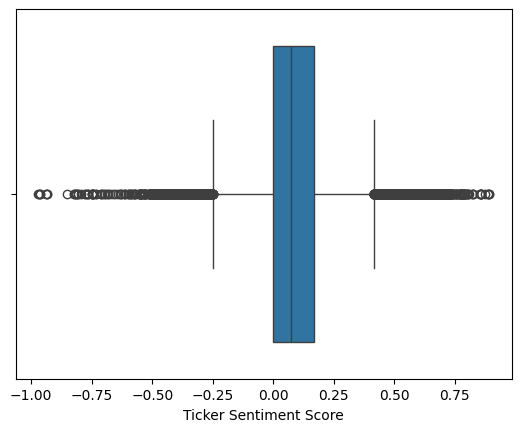

In [61]:
sns.boxplot(x = data['Ticker Sentiment Score'])
plt.show()